In [94]:
from qnet_context import qnetvo as qnet
from mac_context import multiple_access_channels as mac
import matplotlib.pyplot as plt

import numpy as np

from os import listdir
from os.path import isfile, join
import re

# Loading Data


In [95]:
def get_data_files(path, regex):
    """Retrieves all data files that match the ``regex`` in the
    directory specified by ``path``.
    """
    return [
        join(path, f)
        for f in listdir(path)
        if (f.endswith(".json") and isfile(join(path, f)) and bool(re.match(regex, f)))
    ]

def get_inequality_opt_dicts(path, resource_regex):

    opt_dicts = []
    for i in range(0,3):

        file_regex = resource_regex + "_I_" + str(i) + r"_\d\d\d\d-\d\d-\d\dT\d\d-\d\d-\d\dZ"    
        files = get_data_files(path, file_regex)
        opt_dicts += [[qnet.read_optimization_json(file) for file in files]]

    return opt_dicts

## broadcast Data Analysis

In [96]:
data_path = "../data/4-22-44_broadcast_violations/"

eacc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"eacc_bc_arb")
eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"eaqc_bc_arb")
earx_cc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"earx_cc_bc_arb")
earx_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"earx_qc_bc_arb")
gea_cc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"gea_cc_bc_arb")
gea_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"gea_qc_bc_arb")

ghza_cc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"ghza_cc_bc_arb")
ghza_qc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"ghza_qc_bc_arb")
onesided_eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_arb")
# onesided_eaqc_bc_sep_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided_eaqc_bc_sep") # no entanglement is needed for max violation
onesided2_eaqc_bc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"onesided2_eaqc_bc_arb")
qbc_arb_opt_dicts = get_inequality_opt_dicts(data_path, r"qbc_arb")




len(ghza_qc_bc_arb_opt_dicts)

3

## Analyzing Data

In [97]:
broadcast_4_22_44_inequalities = mac.broadcast_4_22_44_network_bounds()

print(len(broadcast_4_22_44_inequalities))


def analyze_data(game_opt_dicts, inequalities):
    max_violations = []
    qbounds = []
    cbounds = []
    for i in range(len(inequalities)):
        opt_dicts = game_opt_dicts[i]
        inequality = inequalities[i]

        cbound = inequality[0]
        cbounds += [cbound]

        qbound = 0.0
        for x in range(4):
            qbound += max(inequality[1][:,x])
        qbounds += [qbound]

        max_violations += [(max([max(opt_dict["scores"]) for opt_dict in opt_dicts]) - cbound) / (qbound - cbound) ]
        

    return max_violations, qbounds, cbounds


qbc_arb_max_violations, qbc_arb_qbounds, qbc_arb_cbounds = analyze_data(qbc_arb_opt_dicts, broadcast_4_22_44_inequalities)

eacc_bc_arb_max_violations, eacc_bc_arb_qbounds, eacc_bc_arb_cbounds = analyze_data(eacc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
eaqc_bc_arb_max_violations, eaqc_bc_arb_qbounds, eaqc_bc_arb_cbounds = analyze_data(eaqc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)

gea_cc_bc_arb_max_violations, gea_cc_bc_arb_qbounds, gea_cc_bc_arb_cbounds = analyze_data(gea_cc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
# gea_qc_bc_arb_max_violations, gea_qc_bc_arb_qbounds, gea_qc_bc_arb_cbounds = analyze_data(gea_qc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)

ghza_cc_bc_arb_max_violations, ghza_cc_bc_arb_qbounds, ghza_cc_bc_arb_cbounds = analyze_data(ghza_cc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
ghza_qc_bc_arb_max_violations, ghza_qc_bc_arb_qbounds, ghza_qc_bc_arb_cbounds = analyze_data(ghza_qc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)


onesided_eaqc_bc_arb_max_violations, onesided_eaqc_bc_arb_qbounds, onesided_eaqc_bc_arb_cbounds = analyze_data(onesided_eaqc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
onesided2_eaqc_bc_arb_max_violations, onesided2_eaqc_bc_arb_qbounds, onesided2_eaqc_bc_arb_cbounds = analyze_data(onesided2_eaqc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)

earx_cc_bc_arb_max_violations, earx_cc_bc_arb_qbounds, earx_cc_bc_arb_cbounds = analyze_data(earx_cc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)
earx_qc_bc_arb_max_violations, earx_qc_bc_arb_qbounds, earx_qc_bc_arb_cbounds = analyze_data(earx_qc_bc_arb_opt_dicts, broadcast_4_22_44_inequalities)


3


In [52]:
eacc_bc_arb_max_violations

[tensor(-5.80060236e-07, requires_grad=True),
 tensor(-0.00100386, requires_grad=True),
 tensor(-4.12226728e-05, requires_grad=True)]

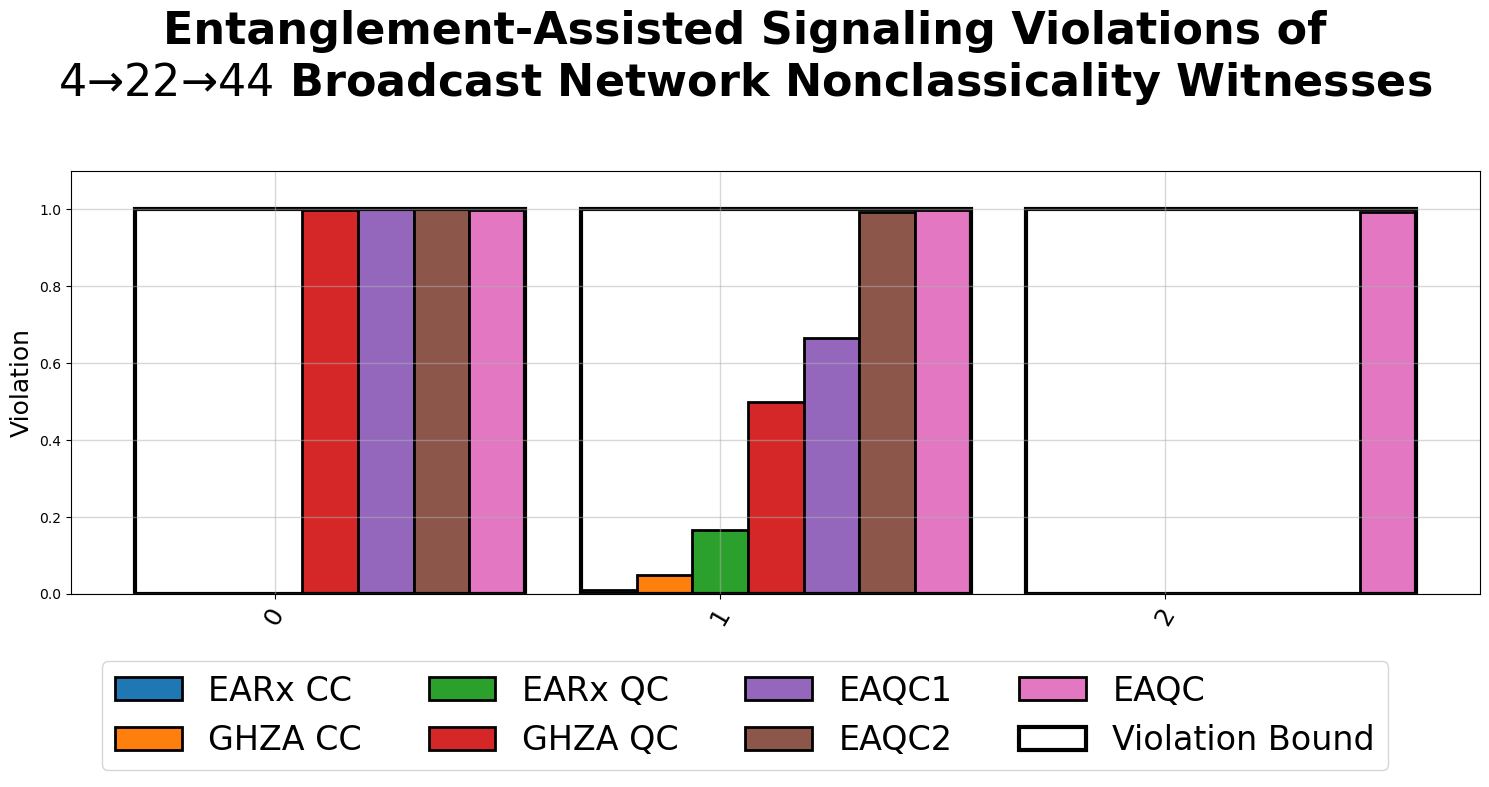

In [102]:
x_axis = np.arange(3)
x_labels = [0,1,2]
width = 1/8

fig, ax1 = plt.subplots(figsize=(15, 8), ncols=1,nrows=1)
ax1.grid(linewidth=1, alpha=0.5)


# ax1.bar(x_axis-1*width, qbc_arb_max_violations, width=width, label="QC", edgecolor="black",linewidth=2)

# ax1.bar(x_axis-0*width, eacc_bc_arb_max_violations, width=width, label="EACC", edgecolor="black",linewidth=2)
ax1.bar(x_axis-2*width, earx_cc_bc_arb_max_violations, width=width, label="EARx CC", edgecolor="black",linewidth=2)
ax1.bar(x_axis-1*width, ghza_cc_bc_arb_max_violations, width=width, label="GHZA CC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+0*width, earx_qc_bc_arb_max_violations, width=width, label="EARx QC", edgecolor="black",linewidth=2)

ax1.bar(x_axis+1*width, ghza_qc_bc_arb_max_violations, width=width, label="GHZA QC", edgecolor="black",linewidth=2)
ax1.bar(x_axis+2*width, onesided_eaqc_bc_arb_max_violations, width=width, label="EAQC1", edgecolor="black",linewidth=2)
ax1.bar(x_axis+3*width, onesided2_eaqc_bc_arb_max_violations, width=width, label="EAQC2", edgecolor="black",linewidth=2)

ax1.bar(x_axis+4*width, eaqc_bc_arb_max_violations, width=width, label="EAQC", edgecolor="black",linewidth=2)





# ax1.bar(x_axis-0*width, onesided2_eaqc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+1*width, eacc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+2*width, ghzaqc_bc_arb_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)
# ax1.bar(x_axis+1*width, onesided_eaqc_bc_sep_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)

# ax1.bar(x_axis+1*width, earx_qc_bc_max_violations, width=width, label="QInt", edgecolor="black",linewidth=2)





plt.bar(x_axis+1*width, [1]*len(qbc_arb_qbounds), width=1-width,  label="Violation Bound", edgecolor="black", linewidth=3, fill=False)

plt.figlegend(loc="lower center", ncols = 4, fontsize=24)


ax1.set_xticks(x_axis, x_labels, fontsize=18, rotation=60)
# ax1.set_yticks(fontsize=24)
ax1.set_ylabel("Violation", fontsize=18)

# ax2.set_yticks(fontsize=24)

# ax2.set_ylabel("Violation", fontsize=24)

fig.suptitle("Entanglement-Assisted Signaling Violations of\n" + r"$4\to 22\to 44$ Broadcast Network Nonclassicality Witnesses" + "\n", size=32, fontweight="bold")


ax1.set_ylim([0,1.1])
# plt.legend(fontsize=20, ncol=3)
plt.tight_layout()
fig.subplots_adjust(bottom=0.25)

plt.show()

In [104]:
mac.rac_game(3)

(18,
 tensor([[1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
          1., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
          0., 1., 1., 1., 0., 1., 1., 1.]], requires_grad=True))